In [41]:
# Imports

import pyodbc as odbc

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Data Retrieval

##### Database Linking

In [42]:
def create_conn_cursor(db_path):
    
    connection_str = (
        r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
        f'DBQ={db_path};'
    )
    
    connection = odbc.connect(connection_str)
    
    return connection.cursor()


In [43]:
databases = {
    
    '08_23': {
        'path': r'C:\Users\Aaron\Desktop\Pitch\data\mdb\avall.mdb',
        'cursor': None
    },
    
    '82_08': {
        'path': r'C:\Users\Aaron\Desktop\Pitch\data\mdb\Pre2008.mdb',
        'cursor': None
    }
    
}


for db in databases:
    databases[db]['cursor'] = create_conn_cursor(databases[db]['path'])
  

##### Create dataframes for each table in each database, store under 'split_dfs' dictionary

In [ ]:
tables = {db: [] for db in databases}

for db in databases:
    for table_info in databases[db]['cursor'].tables(tableType='TABLE'):
        tables[db].append(table_info.table_name)

print(f"0823 DB: {tables['08_23']}", '\n', f"8208 DB: {tables['82_08']}")

0823 DB: ['aircraft', 'Country', 'ct_iaids', 'ct_seqevt', 'dt_aircraft', 'dt_events', 'dt_Flight_Crew', 'eADMSPUB_DataDictionary', 'engines', 'events', 'Events_Sequence', 'Findings', 'Flight_Crew', 'flight_time', 'injury', 'narratives', 'NTSB_Admin', 'Occurrences', 'seq_of_events', 'states'] 
 8208 DB: ['aircraft', 'Country', 'ct_iaids', 'ct_seqevt', 'dt_aircraft', 'dt_events', 'dt_Flight_Crew', 'eADMSPUB_DataDictionary', 'engines', 'events', 'Events_Sequence', 'Findings', 'Flight_Crew', 'flight_time', 'injury', 'narratives', 'NTSB_Admin', 'Occurrences', 'seq_of_events', 'states']


In [45]:
split_dfs = {}

for db_key in tables:
    for table_name in tables[db_key]:
        
        query = f"SELECT * FROM {table_name}"
        
        df = pd.read_sql(query, databases[db_key]['cursor'].connection)

        split_dfs[f"{db_key}_{table_name}"] = df

C:\Users\Aaron\AppData\Local\Temp\ipykernel_9192\2355066816.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, databases[db_key]['cursor'].connection)
C:\Users\Aaron\AppData\Local\Temp\ipykernel_9192\2355066816.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, databases[db_key]['cursor'].connection)
C:\Users\Aaron\AppData\Local\Temp\ipykernel_9192\2355066816.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, databases[db_key]['cursor'].connection)


# EDA

### DF Shapes & Differences

##### Shapes

In [46]:
df_shapes = {}

for df_key in split_dfs:
    df_shapes[df_key] = split_dfs[df_key].shape
    
df_shapes

{'08_23_aircraft': (26064, 93),
 '08_23_Country': (259, 2),
 '08_23_ct_iaids': (955, 11),
 '08_23_ct_seqevt': (2224, 2),
 '08_23_dt_aircraft': (216669, 6),
 '08_23_dt_events': (87948, 5),
 '08_23_dt_Flight_Crew': (146004, 7),
 '08_23_eADMSPUB_DataDictionary': (4574, 13),
 '08_23_engines': (23669, 17),
 '08_23_events': (25653, 73),
 '08_23_Events_Sequence': (55838, 10),
 '08_23_Findings': (60864, 13),
 '08_23_Flight_Crew': (26270, 33),
 '08_23_flight_time': (327193, 8),
 '08_23_injury': (77221, 7),
 '08_23_narratives': (24605, 8),
 '08_23_NTSB_Admin': (25655, 5),
 '08_23_Occurrences': (0, 8),
 '08_23_seq_of_events': (0, 11),
 '08_23_states': (51, 3),
 '82_08_aircraft': (63913, 93),
 '82_08_Country': (257, 2),
 '82_08_ct_iaids': (955, 11),
 '82_08_ct_seqevt': (2224, 2),
 '82_08_dt_aircraft': (487123, 6),
 '82_08_dt_events': (254360, 5),
 '82_08_dt_Flight_Crew': (366463, 7),
 '82_08_eADMSPUB_DataDictionary': (4574, 13),
 '82_08_engines': (63874, 17),
 '82_08_events': (63001, 71),
 '82_08_

Tabulated Form:

|           Table          |   0823    |   8208   |
|-------------------------|-----------|----------|
|        aircraft         |   (26064, 93)  |  (63913, 93) |
|         Country         |   (259, 2) |   (257, 2) |
|       ct_iaids          |   (955, 11) |  (955, 11) |
|      ct_seqevt          |   (2224, 2) |  (2224, 2) |
|     dt_aircraft         |  (216669, 6) | (487123, 6) |
|       dt_events         |  (87948, 5) | (254360, 5) |
|    dt_Flight_Crew       |  (146004, 7) | (366463, 7) |
|  eADMSPUB_DataDictionary|   (4574, 13) | (4574, 13) |
|        engines          |  (23669, 17) | (63874, 17) |
|         events          |  (25653, 73) | (63001, 71) |
|    Events_Sequence      |   (55838, 10) |   (16, 10) |
|        Findings         |   (60864, 13) |   (10, 13) |
|       Flight_Crew       |  (26270, 33) | (66047, 33) |
|      flight_time        |  (327193, 8) | (887597, 8) |
|        injury           |   (77221, 7) | (350758, 7) |
|      narratives         |   (24605, 8) |  (63912, 8) |
|     NTSB_Admin          |   (25655, 5) |  (63001, 5) |
|      Occurrences        |    (0, 8)   | (137989, 8) |
|    seq_of_events        |    (0, 11)  | (264329, 11) |
|        states           |    (51, 3)  |   (51, 3)   |

##### Differences:

In [47]:
def df_differences(df1, df2):
    
    diff_columns = set(df1.columns) ^ set(df2.columns)
    
    return diff_columns

differences = {}

for df_key in split_dfs:
    if '08_23' in df_key:
        differences[df_key] = df_differences(split_dfs[df_key], split_dfs[df_key.replace('08_23', '82_08')])
        
differences = {k: v for k, v in differences.items() if len(v) > 0}

differences

{'08_23_events': {'dec_latitude', 'dec_longitude'}}

### Visualisations:

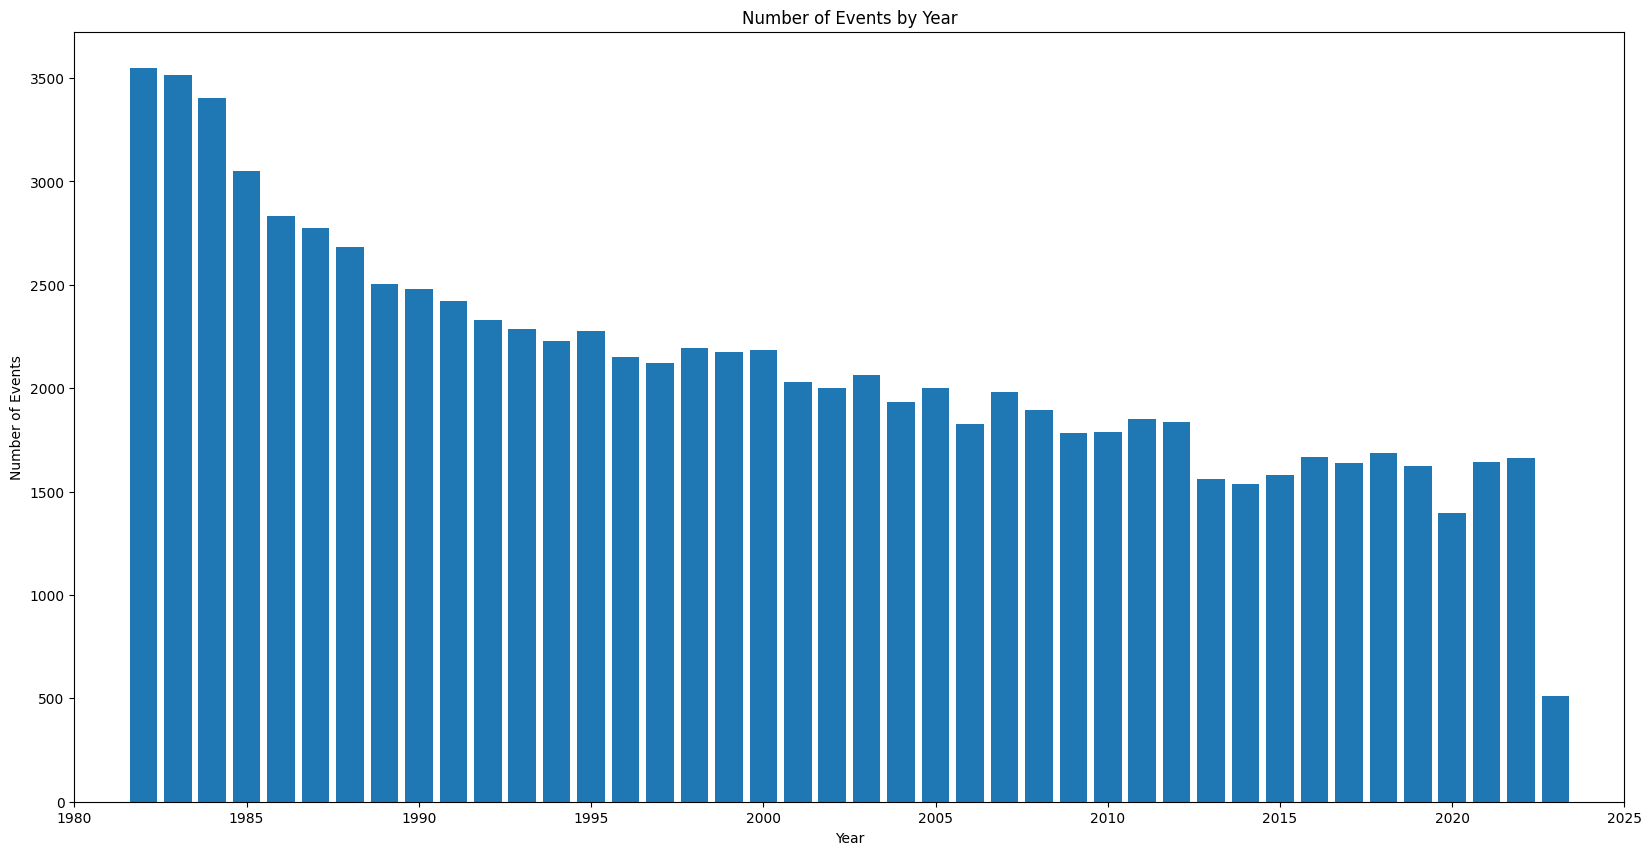

In [48]:
# No. of incidents/accidents per year (combined dfs)

events_combined = pd.concat([split_dfs['08_23_events'], split_dfs['82_08_events']])

plt.figure(figsize=(20, 10))

plt.bar(events_combined['ev_year'].value_counts().index, events_combined['ev_year'].value_counts().values)

plt.xlim(1980, 2025)

plt.title('Number of Events by Year')
plt.xlabel('Year')
plt.ylabel('Number of Events');

### Target Variable:

##### 2008 - 2023

In [49]:
split_dfs['08_23_Events_Sequence'].columns

Index(['ev_id', 'Aircraft_Key', 'Occurrence_No', 'Occurrence_Code',
       'Occurrence_Description', 'phase_no', 'eventsoe_no', 'Defining_ev',
       'lchg_date', 'lchg_userid'],
      dtype='object')

In [50]:
split_dfs['08_23_Events_Sequence'].head()

,ev_id,Aircraft_Key,Occurrence_No,Occurrence_Code,Occurrence_Description,phase_no,eventsoe_no,Defining_ev,lchg_date,lchg_userid
0,20080107X00026,1,1,550250,Landing Midair collision,550,250,True,2020-09-25 18:05:31,None
1,20080107X00026,2,1,350250,Initial climb Midair collision,350,250,True,2020-09-25 18:05:31,None
2,20080109X00036,1,1,551230,Landing-flare/touchdown Loss of control on ground,551,230,True,2020-09-25 18:05:31,None
3,20080109X00036,1,2,550300,Landing Runway excursion,550,300,False,2020-09-25 18:05:31,None
4,20080107X00027,1,1,153081,Standing-engine(s) operating AC/prop/rotor con...,153,081,True,2020-09-25 18:04:02,None


In [ ]:
split_dfs['08_23_Events_Sequence']['eventsoe_no'].describe()

count     55838
unique       96
top         470
freq       9621
Name: eventsoe_no, dtype: object

In [ ]:
mask = split_dfs['08_23_Events_Sequence']['Defining_ev'] == True

In [62]:
split_dfs['08_23_Events_Sequence']['eventsoe_no'][mask].describe()

count     25154
unique       91
top         240
freq       3243
Name: eventsoe_no, dtype: object

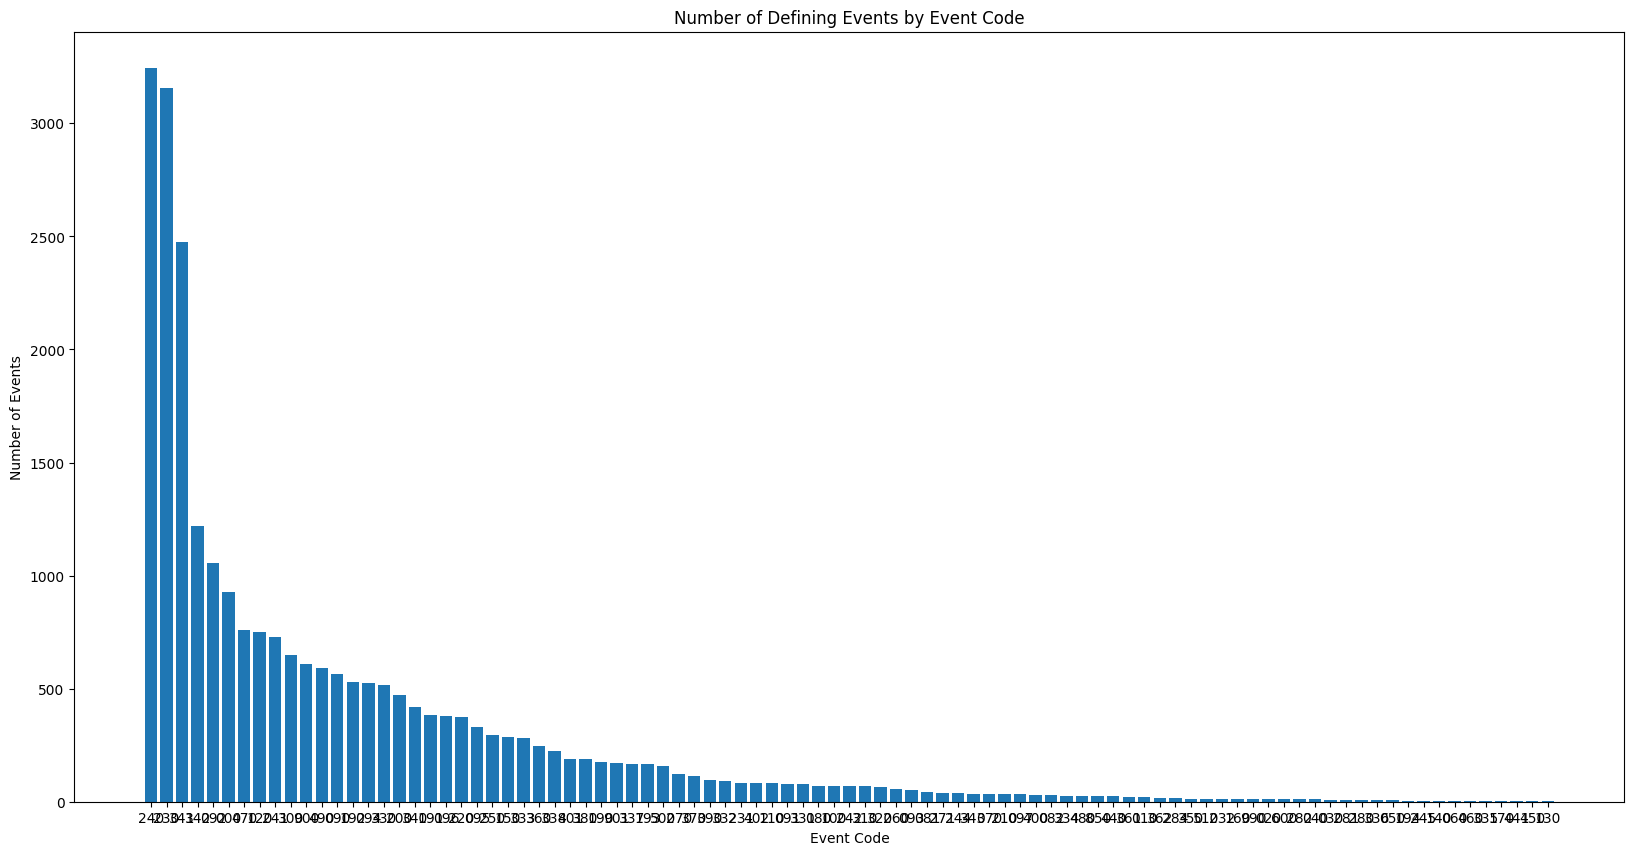

In [63]:
plt.figure(figsize=(20, 10))

plt.bar(split_dfs['08_23_Events_Sequence']['eventsoe_no'][mask].value_counts().index, split_dfs['08_23_Events_Sequence']['eventsoe_no'][mask].value_counts().values)

plt.title('Number of Defining Events by Event Code')
plt.xlabel('Event Code')
plt.ylabel('Number of Events');

##### 1982 - 2008

In [64]:
split_dfs['82_08_Occurrences'].columns

Index(['ev_id', 'Aircraft_Key', 'Occurrence_No', 'Occurrence_Code',
       'Phase_of_Flight', 'Altitude', 'lchg_date', 'lchg_userid'],
      dtype='object')

In [65]:
split_dfs['82_08_Occurrences'].head()

,ev_id,Aircraft_Key,Occurrence_No,Occurrence_Code,Phase_of_Flight,Altitude,lchg_date,lchg_userid
0,20001204X00000,1,1,350,560,0,2000-12-12 11:18:24,dbo
1,20001204X00000,1,2,180,552,0,2000-12-12 11:18:24,dbo
2,20001204X00000,1,3,320,574,0,2000-12-12 11:18:24,dbo
3,20001204X00001,1,1,130,572,0,2000-12-12 11:18:25,dbo
4,20001204X00001,1,2,171,513,0,2000-12-12 11:18:25,dbo


In [71]:
split_dfs['82_08_Occurrences']['Occurrence_Code'].value_counts()

Occurrence_Code
230    22931
180    15301
250    12494
220    10903
260     8083
320     7479
300     6788
310     6752
353     6146
200     5178
350     4778
130     4581
240     3606
351     3003
340     2222
192     1838
191     1708
352     1460
190     1332
354     1235
430     1138
171     1040
380     1020
390      982
270      883
160      755
150      625
290      436
194      381
100      360
232      321
271      278
330      255
196      230
370      208
280      186
110      164
170      134
410      123
420      119
131       85
400       71
132       58
195       51
360       48
198       40
140       32
172       31
0         22
231       19
193       18
120       18
210       15
355       14
197       11
Name: count, dtype: int64

In [72]:
len(split_dfs['82_08_Occurrences']['Occurrence_Code'].value_counts().index)

55

In [83]:
split_dfs['82_08_Occurrences']['Occurrence_Code'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 137989 entries, 0 to 137988
Series name: Occurrence_Code
Non-Null Count   Dtype
--------------   -----
137989 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB


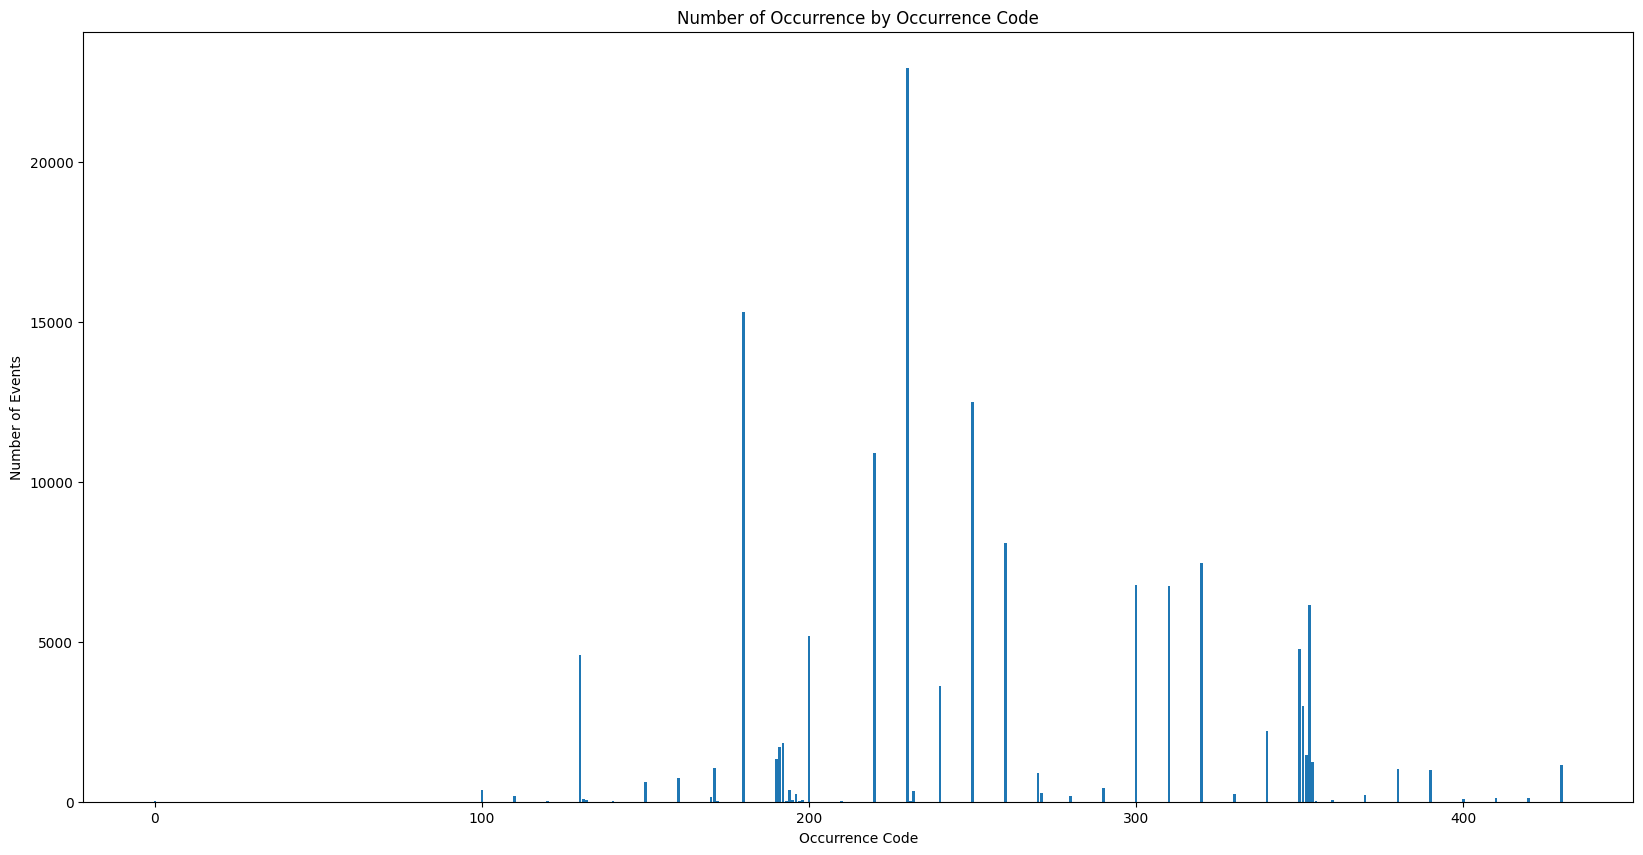

In [74]:
plt.figure(figsize=(20, 10))

plt.bar(split_dfs['82_08_Occurrences']['Occurrence_Code'].value_counts().index, split_dfs['82_08_Occurrences']['Occurrence_Code'].value_counts().values)

plt.title('Number of Occurrence by Occurrence Code')
plt.xlabel('Occurrence Code')
plt.ylabel('Number of Events');

# CSV Conversion

In [76]:
dfs = {}

for df in split_dfs:
    if '08_23' in df: 
        dfs[f"{df.strip('08_23_')}"] = split_dfs[df]
        
dfs.keys()

dict_keys(['aircraft', 'Country', 'ct_iaids', 'ct_seqevt', 'dt_aircraft', 'dt_events', 'dt_Flight_Crew', 'eADMSPUB_DataDictionary', 'engines', 'events', 'Events_Sequence', 'Findings', 'Flight_Crew', 'flight_time', 'injury', 'narratives', 'NTSB_Admin', 'Occurrences', 'seq_of_events', 'states'])

In [77]:
len(dfs)

20

In [78]:
df_shapes = {}

for df in dfs:
    df_shapes[df] = dfs[df].shape
    
df_shapes

{'aircraft': (26064, 93),
 'Country': (259, 2),
 'ct_iaids': (955, 11),
 'ct_seqevt': (2224, 2),
 'dt_aircraft': (216669, 6),
 'dt_events': (87948, 5),
 'dt_Flight_Crew': (146004, 7),
 'eADMSPUB_DataDictionary': (4574, 13),
 'engines': (23669, 17),
 'events': (25653, 73),
 'Events_Sequence': (55838, 10),
 'Findings': (60864, 13),
 'Flight_Crew': (26270, 33),
 'flight_time': (327193, 8),
 'injury': (77221, 7),
 'narratives': (24605, 8),
 'NTSB_Admin': (25655, 5),
 'Occurrences': (0, 8),
 'seq_of_events': (0, 11),
 'states': (51, 3)}

In [81]:
# Write to CSV

import os
 
output_directory = r"C:\Users\Aaron\Desktop\Pitch\data\csv\raw_data"

for df in dfs:
    output_file = os.path.join(output_directory, f"{df}.csv")
    pd.DataFrame.to_csv(dfs[df], output_file, index=False)